In [7]:
import numpy as np
import pandas as pd

import os


In [8]:
train = pd.read_csv('train.csv')
df=train.copy(deep=True)
test= pd.read_csv('test.csv')
overview=pd.read_csv('game_overview.csv')

In [9]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [10]:
overview

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...
...,...,...,...,...,...
59,Bloons TD Battles,Ninja Kiwi,Ninja Kiwi,"['Free to Play', 'Tower Defense', 'Multiplayer...",Play the top-rated tower defense franchise in ...
60,Cuisine Royale,Darkflow Software,Gaijin Distribution KFT,"['Early Access', 'Free to Play', 'Battle Royal...",Cuisine Royale is an all-kitchen-warfare Battl...
61,GUNS UP!,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'A...","In a mashup of RTS & Tower Defense, GUNS UP! i..."
62,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...


### Data Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


### Statistical Summary

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
review_id,17494.0,12423.216989,7653.367660,1.0,5769.25,11756.5,18926.75,25539.0
year,17316.0,2016.388427,1.390356,2011.0,2015.00,2017.0,2018.00,2018.0
user_suggestion,17494.0,0.569795,0.495119,0.0,0.00,1.0,1.00,1.0


In [13]:
df.describe(include=object).T

,count,unique,top,freq
title,17494,44,Robocraft,842
user_review,17494,17490,#NAME?,5


### Checking Nulls

In [14]:
df.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [15]:
df.drop(['review_id','year','title'],axis=1,inplace=True)
df.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [16]:
df

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1
...,...,...
17489,Arguably the single greatest mmorp that exists...,1
17490,"An older game, to be sure, but has its own cha...",1
17491,When I frist started playing Everquest 2 it wa...,1
17492,cool game. THe only thing that REALLY PISSES M...,1


In [17]:
df.user_suggestion.value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [18]:
df.user_review

0        I'm scared and hearing creepy voices.  So I'll...
1        Best game, more better than Sam Pepper's YouTu...
2        A littly iffy on the controls, but once you kn...
3        Great game, fun and colorful and all that.A si...
4        Not many games have the cute tag right next to...
                               ...                        
17489    Arguably the single greatest mmorp that exists...
17490    An older game, to be sure, but has its own cha...
17491    When I frist started playing Everquest 2 it wa...
17492    cool game. THe only thing that REALLY PISSES M...
17493    this game since I was a little kid, always hav...
Name: user_review, Length: 17494, dtype: object

In [19]:
df.isna().sum()

user_review        0
user_suggestion    0
dtype: int64

In [20]:
df.isna().sum()

user_review        0
user_suggestion    0
dtype: int64

In [21]:
df.shape

(17494, 2)

In [22]:
df.user_review[0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [23]:
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [24]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dhananjay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
import re

In [26]:
stopword = nltk.corpus.stopwords.words('english')

In [27]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+','',text_lc)
    tokens = word_tokenize(text_rc,language='english')
    text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    return text
    

In [28]:
print(clean_text(df.user_review[7000]))

['seem', 'plenty', 'review', 'perspective', 'people', 'ccg', 'veteran', 'many', 'ccg', 'novice', 'writing', 'review', 'someone', 'te', 'legend', 'first', 'ccg', 'also', 'playing', 'game', 'month', 'via', 'bethesda', 'launcher', 'low', 'hour', 'recorded', 'steam', 'accuratetesl', 'provides', 'excellent', 'new', 'player', 'experience', 'unfamiliar', 'ccg', 'mechanic', 'gently', 'firmly', 'move', 'towards', 'understanding', 'concept', 'creaturebased', 'card', 'game', 'whole', 'also', 'smoothly', 'integrated', 'game', 'unique', 'mechanic', 'learning', 'process', 'well', 'lane', 'prophecy', 'system', 'story', 'campaign', 'serf', 'extended', 'tutorial', 'provided', 'five', 'separate', 'deck', 'free', 'allow', 'experience', 'different', 'class', 'archetype', 'play', 'relatively', 'easy', 'move', 'story', 'using', 'reconstructed', 'deck', 'final', 'encounter', 'campaign', 'difficult', 'enough', 'forced', 'deck', 'builder', 'try', 'craft', 'deck', 'better', 'starter', 'deck', 'veteran', 'ccg', 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [132]:
df['clean_user_review'] = df['user_review'].apply(lambda x: clean_text(x))

In [133]:
df.head()

,user_review,user_suggestion,clean_user_review
0,I'm scared and hearing creepy voices. So I'll...,1,"[im, scared, hearing, creepy, voice, ill, paus..."
1,"Best game, more better than Sam Pepper's YouTu...",1,"[best, game, better, sam, pepper, youtube, acc..."
2,"A littly iffy on the controls, but once you kn...",1,"[littly, iffy, control, know, play, easy, mast..."
3,"Great game, fun and colorful and all that.A si...",1,"[great, game, fun, colorful, thata, side, note..."
4,Not many games have the cute tag right next to...,1,"[many, game, cute, tag, right, next, horror, t..."


In [134]:
X = df['clean_user_review']
y = df.user_suggestion.values

In [135]:
cvt = CountVectorizer(analyzer=clean_text,ngram_range=(1, 3))
X_v = cvt.fit_transform(X)

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
clf = MultinomialNB()

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X_v,y,test_size=0.33,stratify=y)

In [141]:
y_train

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

#### Naive Bayes

In [144]:
clf.fit(X_train,y_train)

MultinomialNB()

In [145]:
y_pred_n_train = clf.predict(X_train)
y_pred_n = clf.predict(X_test)

In [146]:
cm = sklearn.metrics.confusion_matrix(y_train,y_pred_n_train)

In [148]:
# Train Results
print(sklearn.metrics.accuracy_score(y_train,y_pred_n_train))
print(sklearn.metrics.f1_score(y_train,y_pred_n_train))

0.999914675767918
0.9999251328891218


In [149]:
cm = sklearn.metrics.confusion_matrix(y_test,y_pred_n)

In [151]:
# Test Results
print(sklearn.metrics.accuracy_score(y_test,y_pred_n))
print(sklearn.metrics.f1_score(y_test,y_pred_n))

0.5689296847939037
0.7251849398255492


#### Random Forest

In [152]:
rf = RandomForestClassifier()

In [153]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [154]:
y_pred_rf_train = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

In [155]:
cm = sklearn.metrics.confusion_matrix(y_train,y_pred_rf_train)

In [156]:
# Train Results
print(sklearn.metrics.accuracy_score(y_train,y_pred_rf_train))
print(sklearn.metrics.f1_score(y_train,y_pred_rf_train))

0.9995733788395904
0.9996257765137341


In [157]:
cm = sklearn.metrics.confusion_matrix(y_test,y_pred_rf)

In [158]:
# Test Results
print(sklearn.metrics.accuracy_score(y_test,y_pred_rf))
print(sklearn.metrics.f1_score(y_test,y_pred_rf))

0.5694492552823
0.7256676230412713


In [92]:
import seaborn as sns

In [48]:
df_test  = cm
df_test = pd.DataFrame(df_test)

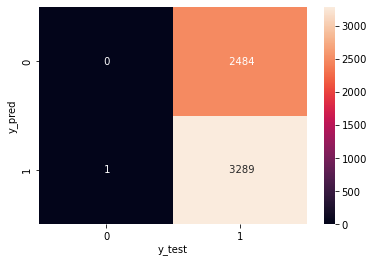

In [49]:
ax = sns.heatmap(df_test,fmt= ' ',annot=True)
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
ax.set_xticklabels(list(set(y_test)))
ax.set_yticklabels(list(set(y_test)));

